# 1. Import and Install Dependencies

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

ModuleNotFoundError: No module named 'matplotlib'

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


KeyboardInterrupt: 

In [12]:
draw_landmarks(frame, results)

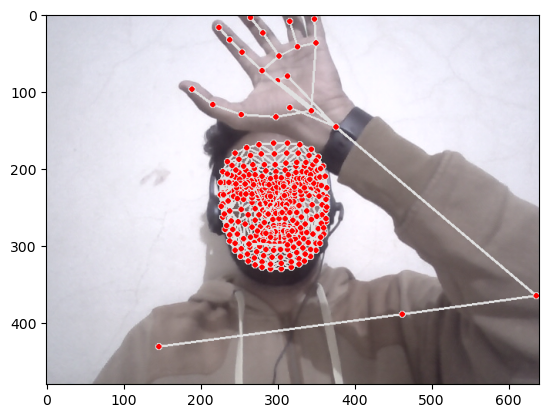

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [14]:
len(results.left_hand_landmarks.landmark)

21

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.45046982,  0.53973979, -1.12618375, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([ 0.45046982,  0.53973979, -1.12618375, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [23]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [24]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [43]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [44]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [45]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [46]:
label_map = {label:num for num, label in enumerate(actions)}

In [47]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [49]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [50]:
np.array(sequences).shape

(90, 30, 1662)

In [51]:
np.array(labels).shape

(90,)

In [52]:
X = np.array(sequences)

In [53]:
X.shape

(90, 30, 1662)

In [54]:
y = to_categorical(labels).astype(int)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [56]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [58]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [59]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [60]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [61]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 65ms/step - loss: 1.1251 - categorical_accuracy: 0.2941
Epoch 2/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1976 - categorical_accuracy: 0.3176
Epoch 3/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1864 - categorical_accuracy: 0.2941
Epoch 4/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.3168 - categorical_accuracy: 0.4235
Epoch 5/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.7418 - categorical_accuracy: 0.2941
Epoch 6/2000
3/3 [==============================] - 0s 62ms/step - loss: 2.2568 - categorical_accuracy: 0.3412
Epoch 7/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.0708 - categorical_accuracy: 0.3059
Epoch 8/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.1757 - categorical_accuracy: 0.3412
Epoch 9/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1341 - categorical_accuracy: 0.3647
E

3/3 [==============================] - 0s 58ms/step - loss: 0.9824 - categorical_accuracy: 0.4118
Epoch 75/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.9425 - categorical_accuracy: 0.5059
Epoch 76/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.9032 - categorical_accuracy: 0.5529
Epoch 77/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.8928 - categorical_accuracy: 0.6235
Epoch 78/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.9130 - categorical_accuracy: 0.5882
Epoch 79/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.9107 - categorical_accuracy: 0.5176
Epoch 80/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.9818 - categorical_accuracy: 0.5294
Epoch 81/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.9741 - categorical_accuracy: 0.5294
Epoch 82/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9729 - categorical_accuracy: 0.5176
Epoch 

3/3 [==============================] - 0s 54ms/step - loss: 1.0495 - categorical_accuracy: 0.5882
Epoch 147/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.8564 - categorical_accuracy: 0.6000
Epoch 148/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7552 - categorical_accuracy: 0.6235
Epoch 149/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.8152 - categorical_accuracy: 0.5059
Epoch 150/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.7576 - categorical_accuracy: 0.6471
Epoch 151/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7537 - categorical_accuracy: 0.6824
Epoch 152/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.8033 - categorical_accuracy: 0.5529
Epoch 153/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.8041 - categorical_accuracy: 0.5765
Epoch 154/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1713 - categorical_accuracy: 0.541

3/3 [==============================] - 0s 50ms/step - loss: 0.8040 - categorical_accuracy: 0.6235
Epoch 219/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.8362 - categorical_accuracy: 0.6118
Epoch 220/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.7604 - categorical_accuracy: 0.7529
Epoch 221/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7572 - categorical_accuracy: 0.6941
Epoch 222/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.7262 - categorical_accuracy: 0.7529
Epoch 223/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.7455 - categorical_accuracy: 0.6588
Epoch 224/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.8029 - categorical_accuracy: 0.6000
Epoch 225/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.7298 - categorical_accuracy: 0.6118
Epoch 226/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.7527 - categorical_accuracy: 0.647

3/3 [==============================] - 0s 50ms/step - loss: 0.8264 - categorical_accuracy: 0.6706
Epoch 291/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.4459 - categorical_accuracy: 0.4235
Epoch 292/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0310 - categorical_accuracy: 0.5412
Epoch 293/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.9942 - categorical_accuracy: 0.5529
Epoch 294/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.8905 - categorical_accuracy: 0.6941
Epoch 295/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0008 - categorical_accuracy: 0.6118
Epoch 296/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.9363 - categorical_accuracy: 0.6118
Epoch 297/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.8461 - categorical_accuracy: 0.6118
Epoch 298/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.9062 - categorical_accuracy: 0.482

3/3 [==============================] - 0s 55ms/step - loss: 0.9770 - categorical_accuracy: 0.6000
Epoch 363/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5869 - categorical_accuracy: 0.7647
Epoch 364/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.5823 - categorical_accuracy: 0.7529
Epoch 365/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.5472 - categorical_accuracy: 0.7882
Epoch 366/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6060 - categorical_accuracy: 0.7176
Epoch 367/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5137 - categorical_accuracy: 0.8353
Epoch 368/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.4948 - categorical_accuracy: 0.8118
Epoch 369/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5308 - categorical_accuracy: 0.7765
Epoch 370/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4528 - categorical_accuracy: 0.835

3/3 [==============================] - 0s 66ms/step - loss: 1.0985 - categorical_accuracy: 0.3529
Epoch 435/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0956 - categorical_accuracy: 0.3529
Epoch 436/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0927 - categorical_accuracy: 0.3529
Epoch 437/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0909 - categorical_accuracy: 0.3529
Epoch 438/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0882 - categorical_accuracy: 0.3529
Epoch 439/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0870 - categorical_accuracy: 0.3529
Epoch 440/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0872 - categorical_accuracy: 0.3412
Epoch 441/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0871 - categorical_accuracy: 0.3412
Epoch 442/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0859 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 58ms/step - loss: 0.2935 - categorical_accuracy: 0.8706
Epoch 507/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3443 - categorical_accuracy: 0.8588
Epoch 508/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.2696 - categorical_accuracy: 0.8941
Epoch 509/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.2766 - categorical_accuracy: 0.8941
Epoch 510/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.2903 - categorical_accuracy: 0.8706
Epoch 511/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.2694 - categorical_accuracy: 0.8941
Epoch 512/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.2460 - categorical_accuracy: 0.8941
Epoch 513/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2615 - categorical_accuracy: 0.8941
Epoch 514/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.2498 - categorical_accuracy: 0.882

3/3 [==============================] - 0s 61ms/step - loss: 0.5026 - categorical_accuracy: 0.8235
Epoch 579/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.5700 - categorical_accuracy: 0.7647
Epoch 580/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.3681 - categorical_accuracy: 0.8353
Epoch 581/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.5213 - categorical_accuracy: 0.8471
Epoch 582/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4116 - categorical_accuracy: 0.8706
Epoch 583/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4330 - categorical_accuracy: 0.8471
Epoch 584/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.4206 - categorical_accuracy: 0.8471
Epoch 585/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.3661 - categorical_accuracy: 0.8824
Epoch 586/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.3720 - categorical_accuracy: 0.882

3/3 [==============================] - 0s 59ms/step - loss: 0.2498 - categorical_accuracy: 0.9059
Epoch 651/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.2450 - categorical_accuracy: 0.9059
Epoch 652/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.2408 - categorical_accuracy: 0.9059
Epoch 653/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2386 - categorical_accuracy: 0.9059
Epoch 654/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2378 - categorical_accuracy: 0.9059
Epoch 655/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2352 - categorical_accuracy: 0.9059
Epoch 656/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2344 - categorical_accuracy: 0.9059
Epoch 657/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2315 - categorical_accuracy: 0.9059
Epoch 658/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.2328 - categorical_accuracy: 0.905

3/3 [==============================] - 0s 55ms/step - loss: 0.1919 - categorical_accuracy: 0.9059
Epoch 723/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.1977 - categorical_accuracy: 0.9059
Epoch 724/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1913 - categorical_accuracy: 0.9059
Epoch 725/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1843 - categorical_accuracy: 0.9059
Epoch 726/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.1819 - categorical_accuracy: 0.9059
Epoch 727/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1804 - categorical_accuracy: 0.9059
Epoch 728/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1794 - categorical_accuracy: 0.9059
Epoch 729/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1795 - categorical_accuracy: 0.9412
Epoch 730/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.1890 - categorical_accuracy: 0.905

3/3 [==============================] - 0s 52ms/step - loss: 0.1835 - categorical_accuracy: 0.9294
Epoch 795/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1758 - categorical_accuracy: 0.9294
Epoch 796/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.1854 - categorical_accuracy: 0.9294
Epoch 797/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.1717 - categorical_accuracy: 0.9294
Epoch 798/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1752 - categorical_accuracy: 0.9529
Epoch 799/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1810 - categorical_accuracy: 0.9176
Epoch 800/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1858 - categorical_accuracy: 0.9059
Epoch 801/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.2219 - categorical_accuracy: 0.8941
Epoch 802/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1940 - categorical_accuracy: 0.952

3/3 [==============================] - 0s 55ms/step - loss: 0.1111 - categorical_accuracy: 0.9765
Epoch 867/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.1077 - categorical_accuracy: 0.9765
Epoch 868/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0904 - categorical_accuracy: 0.9765
Epoch 869/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0879 - categorical_accuracy: 0.9765
Epoch 870/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0852 - categorical_accuracy: 0.9882
Epoch 871/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0844 - categorical_accuracy: 0.9765
Epoch 872/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0746 - categorical_accuracy: 0.9765
Epoch 873/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0682 - categorical_accuracy: 0.9765
Epoch 874/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0738 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 63ms/step - loss: 0.0566 - categorical_accuracy: 0.9882
Epoch 939/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0532 - categorical_accuracy: 0.9765
Epoch 940/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0379 - categorical_accuracy: 1.0000
Epoch 941/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0444 - categorical_accuracy: 1.0000
Epoch 942/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0344 - categorical_accuracy: 1.0000
Epoch 943/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0388 - categorical_accuracy: 0.9882
Epoch 944/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0313 - categorical_accuracy: 0.9882
Epoch 945/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0267 - categorical_accuracy: 1.0000
Epoch 946/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0215 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 57ms/step - loss: 4.4710e-04 - categorical_accuracy: 1.0000
Epoch 1010/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.3310e-04 - categorical_accuracy: 1.0000
Epoch 1011/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.2174e-04 - categorical_accuracy: 1.0000
Epoch 1012/2000
3/3 [==============================] - 0s 53ms/step - loss: 4.1008e-04 - categorical_accuracy: 1.0000
Epoch 1013/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.9965e-04 - categorical_accuracy: 1.0000
Epoch 1014/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.9338e-04 - categorical_accuracy: 1.0000
Epoch 1015/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.8258e-04 - categorical_accuracy: 1.0000
Epoch 1016/2000
3/3 [==============================] - 0s 52ms/step - loss: 3.7139e-04 - categorical_accuracy: 1.0000
Epoch 1017/2000
3/3 [==============================] - 0s 55ms/step - lo

3/3 [==============================] - 0s 55ms/step - loss: 0.2424 - categorical_accuracy: 0.8941
Epoch 1081/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2191 - categorical_accuracy: 0.9294
Epoch 1082/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2771 - categorical_accuracy: 0.8824
Epoch 1083/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2538 - categorical_accuracy: 0.9059
Epoch 1084/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1783 - categorical_accuracy: 0.9412
Epoch 1085/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1708 - categorical_accuracy: 0.9294
Epoch 1086/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1373 - categorical_accuracy: 0.9412
Epoch 1087/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1609 - categorical_accuracy: 0.8941
Epoch 1088/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2180 - categorical_accurac

3/3 [==============================] - 0s 48ms/step - loss: 0.1638 - categorical_accuracy: 0.9529
Epoch 1153/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.1535 - categorical_accuracy: 0.9529
Epoch 1154/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1376 - categorical_accuracy: 0.9529
Epoch 1155/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1348 - categorical_accuracy: 0.9647
Epoch 1156/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1229 - categorical_accuracy: 0.9529
Epoch 1157/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1176 - categorical_accuracy: 0.9647
Epoch 1158/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1035 - categorical_accuracy: 0.9529
Epoch 1159/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0961 - categorical_accuracy: 0.9647
Epoch 1160/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0872 - categorical_accurac

3/3 [==============================] - 0s 55ms/step - loss: 0.0038 - categorical_accuracy: 1.0000
Epoch 1225/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1226/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0032 - categorical_accuracy: 1.0000
Epoch 1227/2000
3/3 [==============================] - 0s 56ms/step - loss: 5.9361e-04 - categorical_accuracy: 1.0000
Epoch 1228/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 1229/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.2212e-04 - categorical_accuracy: 1.0000
Epoch 1230/2000
3/3 [==============================] - 0s 56ms/step - loss: 6.8031e-04 - categorical_accuracy: 1.0000
Epoch 1231/2000
3/3 [==============================] - 0s 56ms/step - loss: 7.1862e-04 - categorical_accuracy: 1.0000
Epoch 1232/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.4530e-04 -

3/3 [==============================] - 0s 79ms/step - loss: 5.9642e-05 - categorical_accuracy: 1.0000
Epoch 1294/2000
3/3 [==============================] - 0s 68ms/step - loss: 5.9007e-05 - categorical_accuracy: 1.0000
Epoch 1295/2000
3/3 [==============================] - 0s 68ms/step - loss: 5.8373e-05 - categorical_accuracy: 1.0000
Epoch 1296/2000
3/3 [==============================] - 0s 68ms/step - loss: 5.7807e-05 - categorical_accuracy: 1.0000
Epoch 1297/2000
3/3 [==============================] - 0s 59ms/step - loss: 5.7196e-05 - categorical_accuracy: 1.0000
Epoch 1298/2000
3/3 [==============================] - 0s 58ms/step - loss: 5.6545e-05 - categorical_accuracy: 1.0000
Epoch 1299/2000
3/3 [==============================] - 0s 56ms/step - loss: 5.5985e-05 - categorical_accuracy: 1.0000
Epoch 1300/2000
3/3 [==============================] - 0s 52ms/step - loss: 5.5392e-05 - categorical_accuracy: 1.0000
Epoch 1301/2000
3/3 [==============================] - 0s 52ms/step - lo

3/3 [==============================] - 0s 63ms/step - loss: 3.1082e-05 - categorical_accuracy: 1.0000
Epoch 1363/2000
3/3 [==============================] - 0s 62ms/step - loss: 3.0751e-05 - categorical_accuracy: 1.0000
Epoch 1364/2000
3/3 [==============================] - 0s 61ms/step - loss: 3.0489e-05 - categorical_accuracy: 1.0000
Epoch 1365/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.0177e-05 - categorical_accuracy: 1.0000
Epoch 1366/2000
3/3 [==============================] - 0s 60ms/step - loss: 3.0060e-05 - categorical_accuracy: 1.0000
Epoch 1367/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.9748e-05 - categorical_accuracy: 1.0000
Epoch 1368/2000
3/3 [==============================] - 0s 63ms/step - loss: 2.9469e-05 - categorical_accuracy: 1.0000
Epoch 1369/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.9232e-05 - categorical_accuracy: 1.0000
Epoch 1370/2000
3/3 [==============================] - 0s 68ms/step - lo

3/3 [==============================] - 0s 47ms/step - loss: 1.7740e-05 - categorical_accuracy: 1.0000
Epoch 1432/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.7611e-05 - categorical_accuracy: 1.0000
Epoch 1433/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.7508e-05 - categorical_accuracy: 1.0000
Epoch 1434/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.7359e-05 - categorical_accuracy: 1.0000
Epoch 1435/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.7237e-05 - categorical_accuracy: 1.0000
Epoch 1436/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.7126e-05 - categorical_accuracy: 1.0000
Epoch 1437/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.7006e-05 - categorical_accuracy: 1.0000
Epoch 1438/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.6885e-05 - categorical_accuracy: 1.0000
Epoch 1439/2000
3/3 [==============================] - 0s 51ms/step - lo

3/3 [==============================] - 0s 48ms/step - loss: 1.0668e-05 - categorical_accuracy: 1.0000
Epoch 1501/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.0599e-05 - categorical_accuracy: 1.0000
Epoch 1502/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0523e-05 - categorical_accuracy: 1.0000
Epoch 1503/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0448e-05 - categorical_accuracy: 1.0000
Epoch 1504/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0356e-05 - categorical_accuracy: 1.0000
Epoch 1505/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.0257e-05 - categorical_accuracy: 1.0000
Epoch 1506/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0191e-05 - categorical_accuracy: 1.0000
Epoch 1507/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0104e-05 - categorical_accuracy: 1.0000
Epoch 1508/2000
3/3 [==============================] - 0s 55ms/step - lo

3/3 [==============================] - 0s 60ms/step - loss: 6.5605e-06 - categorical_accuracy: 1.0000
Epoch 1570/2000
3/3 [==============================] - 0s 61ms/step - loss: 6.5254e-06 - categorical_accuracy: 1.0000
Epoch 1571/2000
3/3 [==============================] - 0s 57ms/step - loss: 6.4946e-06 - categorical_accuracy: 1.0000
Epoch 1572/2000
3/3 [==============================] - 0s 62ms/step - loss: 6.4609e-06 - categorical_accuracy: 1.0000
Epoch 1573/2000
3/3 [==============================] - 0s 57ms/step - loss: 6.4216e-06 - categorical_accuracy: 1.0000
Epoch 1574/2000
3/3 [==============================] - 0s 66ms/step - loss: 6.4020e-06 - categorical_accuracy: 1.0000
Epoch 1575/2000
3/3 [==============================] - 0s 67ms/step - loss: 6.3655e-06 - categorical_accuracy: 1.0000
Epoch 1576/2000
3/3 [==============================] - 0s 59ms/step - loss: 6.3333e-06 - categorical_accuracy: 1.0000
Epoch 1577/2000
3/3 [==============================] - 0s 72ms/step - lo

3/3 [==============================] - 0s 59ms/step - loss: 4.7135e-06 - categorical_accuracy: 1.0000
Epoch 1639/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.6855e-06 - categorical_accuracy: 1.0000
Epoch 1640/2000
3/3 [==============================] - 0s 63ms/step - loss: 4.6687e-06 - categorical_accuracy: 1.0000
Epoch 1641/2000
3/3 [==============================] - 0s 58ms/step - loss: 4.6490e-06 - categorical_accuracy: 1.0000
Epoch 1642/2000
3/3 [==============================] - 0s 52ms/step - loss: 4.6252e-06 - categorical_accuracy: 1.0000
Epoch 1643/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.6070e-06 - categorical_accuracy: 1.0000
Epoch 1644/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.5859e-06 - categorical_accuracy: 1.0000
Epoch 1645/2000
3/3 [==============================] - 0s 60ms/step - loss: 4.5677e-06 - categorical_accuracy: 1.0000
Epoch 1646/2000
3/3 [==============================] - 0s 58ms/step - lo

3/3 [==============================] - 0s 71ms/step - loss: 3.4822e-06 - categorical_accuracy: 1.0000
Epoch 1708/2000
3/3 [==============================] - 0s 83ms/step - loss: 3.4710e-06 - categorical_accuracy: 1.0000
Epoch 1709/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.4556e-06 - categorical_accuracy: 1.0000
Epoch 1710/2000
3/3 [==============================] - 0s 87ms/step - loss: 3.4402e-06 - categorical_accuracy: 1.0000
Epoch 1711/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.4247e-06 - categorical_accuracy: 1.0000
Epoch 1712/2000
3/3 [==============================] - 0s 67ms/step - loss: 3.4191e-06 - categorical_accuracy: 1.0000
Epoch 1713/2000
3/3 [==============================] - 0s 62ms/step - loss: 3.3897e-06 - categorical_accuracy: 1.0000
Epoch 1714/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.3827e-06 - categorical_accuracy: 1.0000
Epoch 1715/2000
3/3 [==============================] - 0s 71ms/step - l

3/3 [==============================] - 0s 75ms/step - loss: 2.5328e-06 - categorical_accuracy: 1.0000
Epoch 1777/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.5230e-06 - categorical_accuracy: 1.0000
Epoch 1778/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.5104e-06 - categorical_accuracy: 1.0000
Epoch 1779/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.5090e-06 - categorical_accuracy: 1.0000
Epoch 1780/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.4879e-06 - categorical_accuracy: 1.0000
Epoch 1781/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.4697e-06 - categorical_accuracy: 1.0000
Epoch 1782/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.4599e-06 - categorical_accuracy: 1.0000
Epoch 1783/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.4487e-06 - categorical_accuracy: 1.0000
Epoch 1784/2000
3/3 [==============================] - 0s 75ms/step - lo

3/3 [==============================] - 0s 70ms/step - loss: 1.7811e-06 - categorical_accuracy: 1.0000
Epoch 1846/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.7797e-06 - categorical_accuracy: 1.0000
Epoch 1847/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.7699e-06 - categorical_accuracy: 1.0000
Epoch 1848/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.7615e-06 - categorical_accuracy: 1.0000
Epoch 1849/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.7348e-06 - categorical_accuracy: 1.0000
Epoch 1850/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.7306e-06 - categorical_accuracy: 1.0000
Epoch 1851/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.7194e-06 - categorical_accuracy: 1.0000
Epoch 1852/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.7026e-06 - categorical_accuracy: 1.0000
Epoch 1853/2000
3/3 [==============================] - 0s 75ms/step - lo

3/3 [==============================] - 0s 78ms/step - loss: 1.2482e-06 - categorical_accuracy: 1.0000
Epoch 1915/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.2328e-06 - categorical_accuracy: 1.0000
Epoch 1916/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.2257e-06 - categorical_accuracy: 1.0000
Epoch 1917/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.2187e-06 - categorical_accuracy: 1.0000
Epoch 1918/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.2173e-06 - categorical_accuracy: 1.0000
Epoch 1919/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.2117e-06 - categorical_accuracy: 1.0000
Epoch 1920/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.2005e-06 - categorical_accuracy: 1.0000
Epoch 1921/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1963e-06 - categorical_accuracy: 1.0000
Epoch 1922/2000
3/3 [==============================] - 0s 91ms/step - lo

3/3 [==============================] - 0s 69ms/step - loss: 9.3824e-07 - categorical_accuracy: 1.0000
Epoch 1984/2000
3/3 [==============================] - 0s 72ms/step - loss: 9.3123e-07 - categorical_accuracy: 1.0000
Epoch 1985/2000
3/3 [==============================] - 0s 62ms/step - loss: 9.2702e-07 - categorical_accuracy: 1.0000
Epoch 1986/2000
3/3 [==============================] - 0s 70ms/step - loss: 9.2281e-07 - categorical_accuracy: 1.0000
Epoch 1987/2000
3/3 [==============================] - 0s 66ms/step - loss: 9.2001e-07 - categorical_accuracy: 1.0000
Epoch 1988/2000
3/3 [==============================] - 0s 65ms/step - loss: 9.1580e-07 - categorical_accuracy: 1.0000
Epoch 1989/2000
3/3 [==============================] - 0s 60ms/step - loss: 9.0739e-07 - categorical_accuracy: 1.0000
Epoch 1990/2000
3/3 [==============================] - 0s 74ms/step - loss: 9.0739e-07 - categorical_accuracy: 1.0000
Epoch 1991/2000
3/3 [==============================] - 0s 64ms/step - lo

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

# 8. Make Predictions

In [64]:
res = model.predict(X_test)

1/1 [==============================] - 0s 384ms/step


In [65]:
actions[np.argmax(res[4])]

'hello'

In [66]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [67]:
# from keras.models import load_weights

In [68]:
model.save('action.h5')

In [69]:
# del model

In [70]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [71]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [72]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 16ms/step


In [73]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [74]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 0],
        [0, 5]]], dtype=int64)

In [75]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [76]:
from scipy import stats

In [77]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [78]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [79]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapi

1/1 [==============================] - 0s 36ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.p

KeyboardInterrupt: 